# Sheet 4: Trees and Random Forests
## Problem 2: Decision Tree Split Evaluation

Vergleich von zwei möglichen Splits mit verschiedenen Impurity-Kriterien

In [5]:
import numpy as np
import pandas as pd
from collections import defaultdict

# Funktion zur Berechnung der Misclassification Rate
def misclassification_rate(class_counts):
    """
    Berechnet die Misclassification Rate für einen Knoten.
    class_counts: Liste oder Array mit Klassenzahlen [n_class_0, n_class_1, ...]
    """
    total = sum(class_counts)
    if total == 0:
        return 0
    # Größte Klasse wählen
    max_class_count = max(class_counts)
    # Misclassification Rate = (total - max_class_count) / total
    return (total - max_class_count) / total

# Funktion zur Berechnung der Gini Impurity
def gini_impurity(class_counts):
    """
    Gini Impurity: H = 1 - Σ(p_i)²
    """
    total = sum(class_counts)
    if total == 0:
        return 0
    probabilities = np.array(class_counts) / total
    return 1 - np.sum(probabilities**2)

# Funktion zur Berechnung der Entropy
def entropy(class_counts):
    """
    Entropy: H = -Σ(p_i * log(p_i))
    """
    total = sum(class_counts)
    if total == 0:
        return 0
    probabilities = np.array(class_counts) / total
    # Nur positive Wahrscheinlichkeiten berücksichtigen
    return -np.sum(probabilities[probabilities > 0] * np.log2(probabilities[probabilities > 0]))

# Initial Node (vor dem Split)
print("="*60)
print("INITIAL NODE (Parent)")
print("="*60)
initial_class_counts = [400, 400]
total_samples = sum(initial_class_counts)

print(f"Klassenzahlen: {initial_class_counts}")
print(f"Gesamt Samples: {total_samples}")
print(f"Wahrscheinlichkeiten: {np.array(initial_class_counts)/total_samples}")
print(f"Misclassification Rate: {misclassification_rate(initial_class_counts):.4f}")
print(f"Gini Impurity: {gini_impurity(initial_class_counts):.4f}")
print(f"Entropy: {entropy(initial_class_counts):.4f}")

print("\n" + "="*60)
print("SPLIT A: (300, 100) und (100, 300)")
print("="*60)

# Split A
split_a_left = [300, 100]
split_a_right = [100, 300]

n_left = sum(split_a_left)
n_right = sum(split_a_right)
n_total = n_left + n_right

print(f"\nLinker Knoten:")
print(f"  Klassenzahlen: {split_a_left}")
print(f"  Samples: {n_left}")
print(f"  Anteil: {n_left/n_total:.2%}")
print(f"  Misclassification Rate: {misclassification_rate(split_a_left):.4f}")
print(f"  Gini Impurity: {gini_impurity(split_a_left):.4f}")
print(f"  Entropy: {entropy(split_a_left):.4f}")

print(f"\nRechter Knoten:")
print(f"  Klassenzahlen: {split_a_right}")
print(f"  Samples: {n_right}")
print(f"  Anteil: {n_right/n_total:.2%}")
print(f"  Misclassification Rate: {misclassification_rate(split_a_right):.4f}")
print(f"  Gini Impurity: {gini_impurity(split_a_right):.4f}")
print(f"  Entropy: {entropy(split_a_right):.4f}")

# Gewichteter Durchschnitt
weighted_misclass_a = (n_left/n_total) * misclassification_rate(split_a_left) + \
                      (n_right/n_total) * misclassification_rate(split_a_right)
weighted_gini_a = (n_left/n_total) * gini_impurity(split_a_left) + \
                  (n_right/n_total) * gini_impurity(split_a_right)
weighted_entropy_a = (n_left/n_total) * entropy(split_a_left) + \
                     (n_right/n_total) * entropy(split_a_right)

print(f"\nGewichtete Metriken (Split A):")
print(f"  Misclassification Rate: {weighted_misclass_a:.4f}")
print(f"  Gini Impurity: {weighted_gini_a:.4f}")
print(f"  Entropy: {weighted_entropy_a:.4f}")

print("\n" + "="*60)
print("SPLIT B: (200, 0) und (200, 400)")
print("="*60)

# Split B
split_b_left = [200, 0]
split_b_right = [200, 400]

n_left = sum(split_b_left)
n_right = sum(split_b_right)
n_total = n_left + n_right

print(f"\nLinker Knoten:")
print(f"  Klassenzahlen: {split_b_left}")
print(f"  Samples: {n_left}")
print(f"  Anteil: {n_left/n_total:.2%}")
print(f"  Misclassification Rate: {misclassification_rate(split_b_left):.4f}")
print(f"  Gini Impurity: {gini_impurity(split_b_left):.4f}")
print(f"  Entropy: {entropy(split_b_left):.4f}")

print(f"\nRechter Knoten:")
print(f"  Klassenzahlen: {split_b_right}")
print(f"  Samples: {n_right}")
print(f"  Anteil: {n_right/n_total:.2%}")
print(f"  Misclassification Rate: {misclassification_rate(split_b_right):.4f}")
print(f"  Gini Impurity: {gini_impurity(split_b_right):.4f}")
print(f"  Entropy: {entropy(split_b_right):.4f}")

# Gewichteter Durchschnitt
weighted_misclass_b = (n_left/n_total) * misclassification_rate(split_b_left) + \
                      (n_right/n_total) * misclassification_rate(split_b_right)
weighted_gini_b = (n_left/n_total) * gini_impurity(split_b_left) + \
                  (n_right/n_total) * gini_impurity(split_b_right)
weighted_entropy_b = (n_left/n_total) * entropy(split_b_left) + \
                     (n_right/n_total) * entropy(split_b_right)

print(f"\nGewichtete Metriken (Split B):")
print(f"  Misclassification Rate: {weighted_misclass_b:.4f}")
print(f"  Gini Impurity: {weighted_gini_b:.4f}")
print(f"  Entropy: {weighted_entropy_b:.4f}")

print("\n" + "="*60)
print("VERGLEICH & EMPFEHLUNGEN")
print("="*60)

print(f"\n{'Metrik':<25} {'Split A':<15} {'Split B':<15} {'Besser':<10}")
print("-" * 65)

# Misclassification Rate
print(f"{'Misclassification Rate':<25} {weighted_misclass_a:<15.4f} {weighted_misclass_b:<15.4f}", end="")
print(f" {'Split B' if weighted_misclass_b < weighted_misclass_a else 'Split A':<10}")

# Gini Impurity
print(f"{'Gini Impurity':<25} {weighted_gini_a:<15.4f} {weighted_gini_b:<15.4f}", end="")
print(f" {'Split B' if weighted_gini_b < weighted_gini_a else 'Split A':<10}")

# Entropy
print(f"{'Entropy':<25} {weighted_entropy_a:<15.4f} {weighted_entropy_b:<15.4f}", end="")
print(f" {'Split B' if weighted_entropy_b < weighted_entropy_a else 'Split A':<10}")

print("\n" + "="*60)
print("SCHLUSSFOLGERUNGEN")
print("="*60)
print(f"""
Die Metriken bevorzugen folgende Splits:

- Misclassification Rate: Split {'B' if weighted_misclass_b < weighted_misclass_a else 'A'} ist besser
  (Gewichtete Rate: Split A = {weighted_misclass_a:.4f}, Split B = {weighted_misclass_b:.4f})

- Gini Impurity: Split {'B' if weighted_gini_b < weighted_gini_a else 'A'} ist besser
  (Gewichtete Gini: Split A = {weighted_gini_a:.4f}, Split B = {weighted_gini_b:.4f})

- Entropy: Split {'B' if weighted_entropy_b < weighted_entropy_a else 'A'} ist besser
  (Gewichtete Entropy: Split A = {weighted_entropy_a:.4f}, Split B = {weighted_entropy_b:.4f})

EMPFEHLUNG: Alle Kriterien bevorzugen Split B, da dieser zu einer besseren
Trennung der Klassen führt und die Impurity stärker reduziert.
""")

INITIAL NODE (Parent)
Klassenzahlen: [400, 400]
Gesamt Samples: 800
Wahrscheinlichkeiten: [0.5 0.5]
Misclassification Rate: 0.5000
Gini Impurity: 0.5000
Entropy: 1.0000

SPLIT A: (300, 100) und (100, 300)

Linker Knoten:
  Klassenzahlen: [300, 100]
  Samples: 400
  Anteil: 50.00%
  Misclassification Rate: 0.2500
  Gini Impurity: 0.3750
  Entropy: 0.8113

Rechter Knoten:
  Klassenzahlen: [100, 300]
  Samples: 400
  Anteil: 50.00%
  Misclassification Rate: 0.2500
  Gini Impurity: 0.3750
  Entropy: 0.8113

Gewichtete Metriken (Split A):
  Misclassification Rate: 0.2500
  Gini Impurity: 0.3750
  Entropy: 0.8113

SPLIT B: (200, 0) und (200, 400)

Linker Knoten:
  Klassenzahlen: [200, 0]
  Samples: 200
  Anteil: 25.00%
  Misclassification Rate: 0.0000
  Gini Impurity: 0.0000
  Entropy: -0.0000

Rechter Knoten:
  Klassenzahlen: [200, 400]
  Samples: 600
  Anteil: 75.00%
  Misclassification Rate: 0.3333
  Gini Impurity: 0.4444
  Entropy: 0.9183

Gewichtete Metriken (Split B):
  Misclassificati

## Problem 2b: Optimal splits (1D)
Berechne die Impurity-Metriken für alle möglichen Splits und visualisiere die von jeder Metrik gewählte Aufteilung.

Beste Splits:
- Misclassification: i=95, threshold=0.6149, score=0.1967
- Gini: i=170, threshold=1.7080, score=0.2972
- Entropy: i=177, threshold=1.8162, score=0.6119


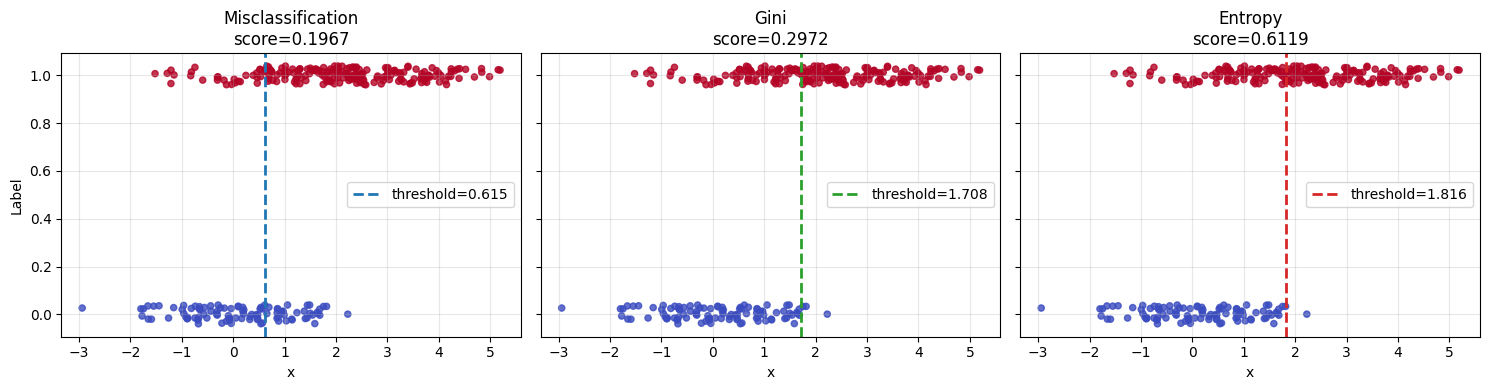

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fallback: falls die Funktionen aus 2a nicht ausgeführt wurden
try:
    misclassification_rate
    gini_impurity
    entropy
except NameError:
    def misclassification_rate(class_counts):
        total = sum(class_counts)
        if total == 0:
            return 0
        max_class_count = max(class_counts)
        return (total - max_class_count) / total

    def gini_impurity(class_counts):
        total = sum(class_counts)
        if total == 0:
            return 0
        probabilities = np.array(class_counts) / total
        return 1 - np.sum(probabilities**2)

    def entropy(class_counts):
        total = sum(class_counts)
        if total == 0:
            return 0
        probabilities = np.array(class_counts) / total
        return -np.sum(probabilities[probabilities > 0] * np.log2(probabilities[probabilities > 0]))

# Daten laden (1D Features + binäre Labels)
x = np.load("data/data1d.npy")
y = np.load("data/labels1d.npy")

# Sortieren nach Feature-Wert
order = np.argsort(x)
x_sorted = x[order]
y_sorted = y[order]
N = len(x_sorted)

def class_counts(labels):
    # binäre Klassen 0/1
    n0 = np.sum(labels == 0)
    n1 = np.sum(labels == 1)
    return [int(n0), int(n1)]

# Alle möglichen Splits i=1..N-1
splits = np.arange(1, N)
misclass_scores = []
gini_scores = []
entropy_scores = []
thresholds = []

for i in splits:
    left_labels = y_sorted[:i]
    right_labels = y_sorted[i:]

    left_counts = class_counts(left_labels)
    right_counts = class_counts(right_labels)

    n_left = len(left_labels)
    n_right = len(right_labels)
    n_total = n_left + n_right

    # gewichtete Impurity
    mis = (n_left/n_total) * misclassification_rate(left_counts) + (n_right/n_total) * misclassification_rate(right_counts)
    gini = (n_left/n_total) * gini_impurity(left_counts) + (n_right/n_total) * gini_impurity(right_counts)
    ent = (n_left/n_total) * entropy(left_counts) + (n_right/n_total) * entropy(right_counts)

    misclass_scores.append(mis)
    gini_scores.append(gini)
    entropy_scores.append(ent)

    # Schwelle zwischen x[i-1] und x[i]
    thr = 0.5 * (x_sorted[i-1] + x_sorted[i])
    thresholds.append(thr)

misclass_scores = np.array(misclass_scores)
gini_scores = np.array(gini_scores)
entropy_scores = np.array(entropy_scores)
thresholds = np.array(thresholds)

# Beste Splits (Minimum der Impurity)
best_mis_idx = np.argmin(misclass_scores)
best_gini_idx = np.argmin(gini_scores)
best_ent_idx = np.argmin(entropy_scores)

best = {
    "Misclassification": (best_mis_idx, thresholds[best_mis_idx], misclass_scores[best_mis_idx]),
    "Gini": (best_gini_idx, thresholds[best_gini_idx], gini_scores[best_gini_idx]),
    "Entropy": (best_ent_idx, thresholds[best_ent_idx], entropy_scores[best_ent_idx]),
}

print("Beste Splits:")
for name, (idx, thr, score) in best.items():
    print(f"- {name}: i={idx+1}, threshold={thr:.4f}, score={score:.4f}")

# Visualisierung der ausgewählten Splits
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
methods = ["Misclassification", "Gini", "Entropy"]
colors = ["#1f77b4", "#2ca02c", "#d62728"]

# leichtes Jitter für Labels
jitter = (np.random.rand(N) - 0.5) * 0.08
y_plot = y_sorted + jitter

for ax, method, color in zip(axes, methods, colors):
    idx, thr, score = best[method]
    ax.scatter(x_sorted, y_plot, c=y_sorted, cmap="coolwarm", s=20, alpha=0.8)
    ax.axvline(thr, color=color, linestyle="--", linewidth=2, label=f"threshold={thr:.3f}")
    ax.set_title(f"{method}\nscore={score:.4f}")
    ax.set_xlabel("x")
    ax.grid(True, alpha=0.3)
    ax.legend()

axes[0].set_ylabel("Label")
plt.tight_layout()
plt.show()

## Problem 2c: Random Forests auf Jet-Tagging-Daten
Trainiere Random-Forest-Modelle mit verschiedenen Hyperparametern, wähle die beste Konfiguration anhand des Validation-Sets und evaluiere auf dem Test-Set.

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Daten laden
X = np.load("data/dijet_features_normalized.npy")
y = np.load("data/dijet_labels.npy")

# Shuffle und Split: Validation/Test je 200 (falls möglich), Rest Train
rng = np.random.default_rng(42)
indices = rng.permutation(len(X))
N = len(X)

# Sicherstellen, dass Training nicht leer wird
val_size = min(200, max(1, N // 5))
test_size = min(200, max(1, N // 5))
if val_size + test_size >= N:
    # mindestens 1 Sample fürs Training lassen
    test_size = max(1, N - val_size - 1)
    if val_size + test_size >= N:
        val_size = max(1, N - test_size - 1)

val_idx = indices[:val_size]
test_idx = indices[val_size:val_size + test_size]
train_idx = indices[val_size + test_size:]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]
X_test, y_test = X[test_idx], y[test_idx]

print(f"Split sizes -> train: {len(X_train)}, val: {len(X_val)}, test: {len(X_test)}")

# Hyperparameter-Grid
n_estimators_list = [5, 10, 20, 100]
criteria = ["gini", "entropy"]
max_depth_list = [2, 5, 10, None]

results = []
best = {"acc": -np.inf, "params": None}

for n_estimators in n_estimators_list:
    for criterion in criteria:
        for max_depth in max_depth_list:
            clf = RandomForestClassifier(
                n_estimators=n_estimators,
                criterion=criterion,
                max_depth=max_depth,
                random_state=42,
                n_jobs=-1
            )
            clf.fit(X_train, y_train)
            val_pred = clf.predict(X_val)
            val_acc = accuracy_score(y_val, val_pred)

            results.append({
                "n_estimators": n_estimators,
                "criterion": criterion,
                "max_depth": "pure" if max_depth is None else max_depth,
                "val_acc": val_acc
            })

            if val_acc > best["acc"]:
                best["acc"] = val_acc
                best["params"] = (n_estimators, criterion, max_depth)

# Ergebnisse sortiert anzeigen
df = pd.DataFrame(results).sort_values("val_acc", ascending=False)
print("Top-5 Konfigurationen (Validation):")
print(df.head(5).to_string(index=False))

# Bestes Modell auf Test evaluieren
best_n_estimators, best_criterion, best_max_depth = best["params"]
best_clf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    criterion=best_criterion,
    max_depth=best_max_depth,
    random_state=42,
    n_jobs=-1
)
best_clf.fit(X_train, y_train)
test_pred = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print("\nBeste Hyperparameter:")
print(f"- n_estimators: {best_n_estimators}")
print(f"- criterion: {best_criterion}")
print(f"- max_depth: {'pure' if best_max_depth is None else best_max_depth}")
print(f"Validation Accuracy: {best['acc']:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Split sizes -> train: 70, val: 23, test: 23
Top-5 Konfigurationen (Validation):
 n_estimators criterion max_depth  val_acc
           10      gini      pure 0.826087
           20   entropy      pure 0.826087
           20   entropy         5 0.826087
           20      gini      pure 0.826087
           20      gini        10 0.826087

Beste Hyperparameter:
- n_estimators: 5
- criterion: gini
- max_depth: 5
Validation Accuracy: 0.8261
Test Accuracy: 0.8696
